In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA 是一种用于预测时间序列数据未来趋势的模型。它是一种回归分析模型。

AR（自回归）： 显示一个变化的变量对其自身滞后/先前值进行回归的模型。
I（综合）： 对原始观测数据进行差分，使时间序列趋于稳定
MA（移动平均）： 观测值与移动平均模型的残差误差之间的依赖关系
对于 ARIMA 模型，标准符号为 ARIMA，其中 p、d 和 q 用整数值代替参数，以表示所使用的 ARIMA 模型类型。

p：模型中滞后观测值的数量；也称为滞后阶数。
d：原始观测值的差分次数；也称为差分程度。
q：移动平均窗口的大小；也称为移动平均阶数。
有关 ARIMA 的更多信息，请查阅
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

## Read Dataset

In [2]:
df = pd.read_excel('中心城市客运量 广州.xlsx',engine='openpyxl',header=0,parse_dates=["时间"],index_col=[0])

In [3]:
df.head()

,中心城市客运量:广州:累计值:月,中心城市客运量:广州:当期值:月
时间,,
2022-12-31,374417,18319
2022-11-30,356098,13942
2022-10-31,342156,31599
2022-09-30,310557,35338
2022-08-31,275219,38040


In [4]:
df.drop("中心城市客运量:广州:当期值:月", axis=1, inplace=True)

In [5]:
df.sort_values('时间', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2019-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   中心城市客运量:广州:累计值:月  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


In [7]:
df.head()

,中心城市客运量:广州:累计值:月
时间,
2019-01-31,51280
2019-02-28,89736
2019-03-31,143972
2019-04-30,195113
2019-05-31,248139


In [8]:
# 确保索引为日期时间类型
df.index = pd.to_datetime(df.index)

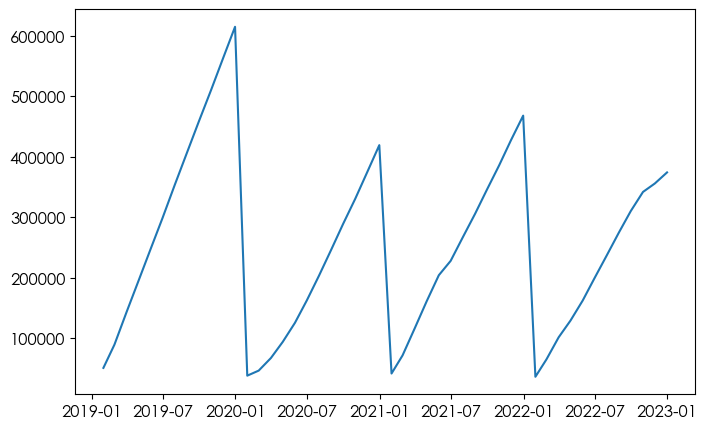

In [9]:
plt.figure(figsize=(8,5))
plt.rc('font', family='STXihei', size=12)
plt.plot(df.index, df["中心城市客运量:广州:累计值:月"], linestyle="-")
plt.xlabel=('时间')
plt.ylabel=('中心城市客运量:巡游出租汽车:广州:累计值:月')
plt.show();

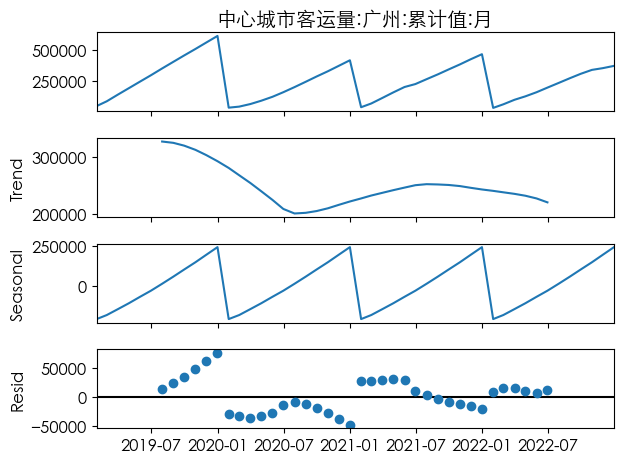

In [10]:
# 经典季节性时间序列分解
a = seasonal_decompose(df["中心城市客运量:广州:累计值:月"], model = "add")
plt.rc('font', family='STXihei', size=12)
a.plot();

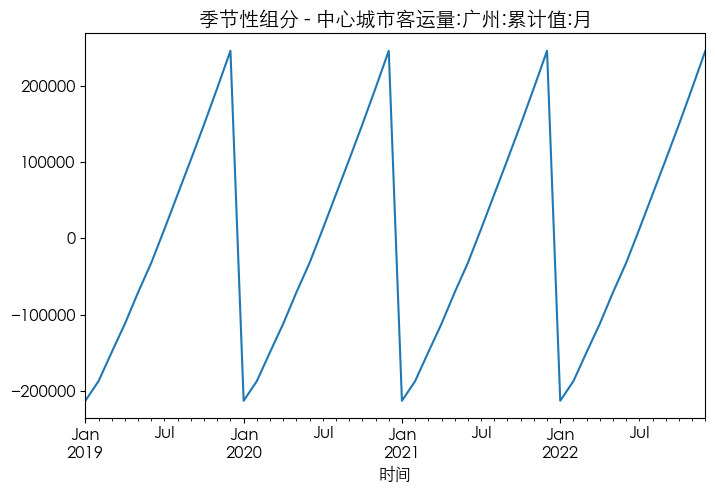

In [11]:
# plt.title('中心城市客运量累计值 季节性时间序列分解后')
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.rc('font', family='STXihei', size=12)
plt.title('季节性组分 - 中心城市客运量:广州:累计值:月')

a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [12]:
auto_arima(df['中心城市客运量:广州:累计值:月'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -615.345
Date:                                    Tue, 07 May 2024   AIC                           1242.690
Time:                                            23:14:09   BIC                           1253.917
Sample:                                        01-31-2019   HQIC                          1246.932
                                             - 12-31-2022                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.595e+04   8.63e+04      1.112      0.266   -7.32e+04    2.65e+05
ar.L1          0.6479      0.260      2.496      0.013       0.139       1.157
ma.S.L12       0.5915      0.529      1.118      0.264      -0.446       1.629
ma.S.L24       0.4744      1.794      0.264      0.791      -3.042       3.991
ma.S.L36       0.2503      2.394      0.105      0.917      -4.442       4.942
sigma2      1.265e+10      0.159   7.97e+10      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.24   Jarque-Bera (JB):                53.32
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.57e+27. Standard errors may be unstable.
"""

In [13]:
train_data = df
test_data = df

In [14]:
arima_model = SARIMAX(train_data['中心城市客运量:广州:累计值:月'], order = (1,0,0), seasonal_order = (2,1,2,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                        中心城市客运量:广州:累计值:月   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -438.135
Date:                                 Tue, 07 May 2024   AIC                            888.271
Time:                                         23:14:10   BIC                            897.772
Sample:                                     01-31-2019   HQIC                           891.587
                                          - 12-31-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2546      0.063      4.057      0.000       0.132       0.378
ar.S.L12       1.2181    147.320      0.008      0.993    -287.523     289.959
ar.S.L24      -0.2188     32.657     -0.007      0.995     -64.226      63.789
ma.S.L12      -1.9999    147.501     -0.014      0.989    -291.096     287.096
ma.S.L24       1.0000    148.342      0.007      0.995    -289.746     291.745
sigma2      1.391e+09   2.65e-07   5.26e+15      0.000    1.39e+09    1.39e+09
===================================================================================
Ljung-Box (L1) (Q):                  11.79   Jarque-Bera (JB):                 9.20
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.19   Skew:                            -0.65
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.23e+34. Standard errors may be unstable.
"""

In [15]:
n_future = 36  # 预测未来的时间点数量
arima_pred = arima_result.predict(start = len(df), end = len(df) + n_future - 1,typ="levels").rename("SARIMA Predictions")
arima_pred

2023-01-31     31607.480801
2023-02-28     54937.508837
2023-03-31     86655.611934
2023-04-30    114886.396289
2023-05-31    146080.439004
2023-06-30    176523.140599
2023-07-31    210450.747916
2023-08-31    244555.158288
2023-09-30    277390.142156
2023-10-31    308728.343970
2023-11-30    333189.131174
2023-12-31    358786.054444
2024-01-31     31771.393706
2024-02-29     52991.871906
2024-03-31     83413.833136
2024-04-30    111717.368980
2024-05-31    142470.671026
2024-06-30    171463.098180
2024-07-31    204596.984791
2024-08-31    237839.161967
2024-09-30    270125.896266
2024-10-31    301407.033955
2024-11-30    328171.939100
2024-12-31    355363.119444
2025-01-31     31807.386317
2025-02-28     52565.854275
2025-03-31     82703.996508
2025-04-30    111023.538977
2025-05-31    141680.382350
2025-06-30    170355.211880
2025-07-31    203315.328168
2025-08-31    236368.729975
2025-09-30    268535.461097
2025-10-31    299804.178016
2025-11-30    327073.824319
2025-12-31    354614

In [16]:
future_index = pd.date_range(start=df.index[-1], periods=n_future + 1, freq='M')[1:]
future_index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
arima_pred_series = pd.Series(arima_pred.values, index=future_index, name='SARIMA Predictions')
arima_pred_series

2023-01-31     31607.480801
2023-02-28     54937.508837
2023-03-31     86655.611934
2023-04-30    114886.396289
2023-05-31    146080.439004
2023-06-30    176523.140599
2023-07-31    210450.747916
2023-08-31    244555.158288
2023-09-30    277390.142156
2023-10-31    308728.343970
2023-11-30    333189.131174
2023-12-31    358786.054444
2024-01-31     31771.393706
2024-02-29     52991.871906
2024-03-31     83413.833136
2024-04-30    111717.368980
2024-05-31    142470.671026
2024-06-30    171463.098180
2024-07-31    204596.984791
2024-08-31    237839.161967
2024-09-30    270125.896266
2024-10-31    301407.033955
2024-11-30    328171.939100
2024-12-31    355363.119444
2025-01-31     31807.386317
2025-02-28     52565.854275
2025-03-31     82703.996508
2025-04-30    111023.538977
2025-05-31    141680.382350
2025-06-30    170355.211880
2025-07-31    203315.328168
2025-08-31    236368.729975
2025-09-30    268535.461097
2025-10-31    299804.178016
2025-11-30    327073.824319
2025-12-31    354614

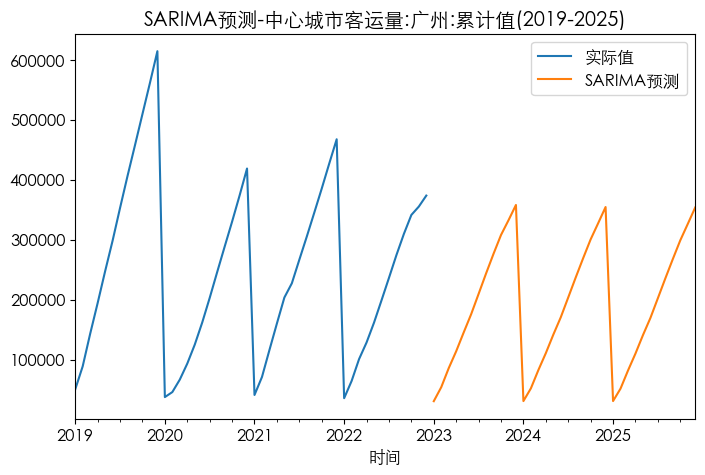

In [18]:
# 绘制测试数据和 SARIMA 模型的预测结果
plt.figure(figsize=(8, 5))
df['中心城市客运量:广州:累计值:月'].plot(label='实际值', legend=True)
arima_pred_series.plot(label='SARIMA预测', legend=True)
plt.title('SARIMA预测-中心城市客运量:广州:累计值(2019-2025)')
plt.show()

## LSTM Forecast

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu',input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
lstm_model.fit(generator, epochs=190,batch_size=32)

Epoch 1/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0685
Epoch 2/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0503
Epoch 3/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0487
Epoch 4/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0375
Epoch 5/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208
Epoch 6/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106   
Epoch 7/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133   
Epoch 8/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102   
Epoch 9/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104  
Epoch 10/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140
Epoch 11/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038   
Epoch 12/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083   
Epoch 13/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247
Epoch 14/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099
Epoch 15/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016   
Epoch 81/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 82/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4486e-04
Epoch 83/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2850e-04
Epoch 84/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5997e-04
Epoch 85/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5235e-04
Epoch 86/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 87/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0353e-04
Epoch 88/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014   
Epoch 89/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5272e-04
Epoch 90/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1909e-04
Epoch 91/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3017e-04
Epoch 92/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6123e-04
Epoch 93/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011   
Epoch 94/190
36/36 ━━━━━━━━━━━

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011    
Epoch 158/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7326e-04
Epoch 159/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9108e-04
Epoch 160/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010  
Epoch 161/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2604e-04
Epoch 162/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3526e-04
Epoch 163/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3343e-04
Epoch 164/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8556e-04
Epoch 165/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9408e-04
Epoch 166/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010   
Epoch 167/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6420e-04
Epoch 168/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012  
Epoch 169/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8192e-04
Epoch 170/190
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1848e-04
Epoch 171/1

Text(0.5, 1.0, '中心城市客运量:广州:累计值 LSTM训练损失')

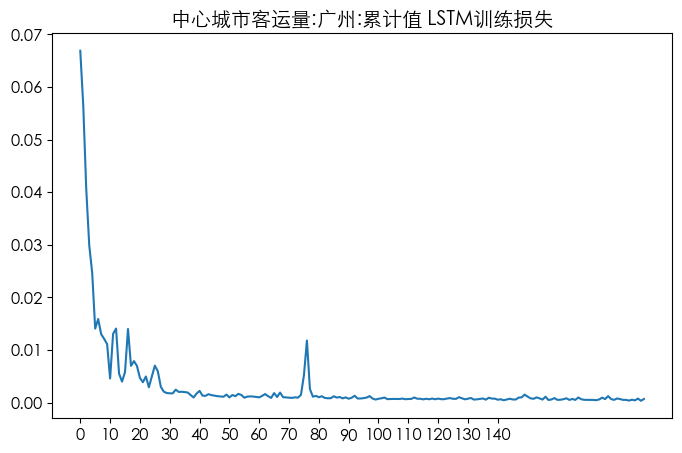

In [24]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(8,5))
plt.xticks(np.arange(0,150,10))
plt.plot(range(len(losses_lstm)),losses_lstm);
plt.title('中心城市客运量:广州:累计值 LSTM训练损失')

In [25]:
# 生成时间序列预测
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)+36):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━

In [26]:
lstm_predictions_scaled

[array([0.01576377], dtype=float32),
 array([0.07512802], dtype=float32),
 array([0.14698954], dtype=float32),
 array([0.21296036], dtype=float32),
 array([0.2782191], dtype=float32),
 array([0.34449607], dtype=float32),
 array([0.41209832], dtype=float32),
 array([0.4796699], dtype=float32),
 array([0.5461414], dtype=float32),
 array([0.60925734], dtype=float32),
 array([0.6675028], dtype=float32),
 array([0.7187123], dtype=float32),
 array([0.00723808], dtype=float32),
 array([0.05969689], dtype=float32),
 array([0.12343316], dtype=float32),
 array([0.18255396], dtype=float32),
 array([0.24377722], dtype=float32),
 array([0.30882928], dtype=float32),
 array([0.37666467], dtype=float32),
 array([0.44583976], dtype=float32),
 array([0.5143349], dtype=float32),
 array([0.5802846], dtype=float32),
 array([0.6416389], dtype=float32),
 array([0.69640666], dtype=float32),
 array([0.00390073], dtype=float32),
 array([0.0604018], dtype=float32),
 array([0.12812036], dtype=float32),
 array([0.

In [27]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [28]:
lstm_predictions

array([[ 45711.57313088],
       [ 80058.41889369],
       [121635.91364923],
       [159805.18057656],
       [197562.45264602],
       [235908.84796298],
       [275022.02082759],
       [314117.45067805],
       [352576.39084768],
       [389093.89351201],
       [422793.4468745 ],
       [452422.10790241],
       [ 40778.79534744],
       [ 71130.30530644],
       [108006.70957455],
       [142212.70615259],
       [177635.13377845],
       [215272.82586426],
       [254520.89046818],
       [294544.07821631],
       [334173.86764765],
       [372330.90068913],
       [407829.13702416],
       [439516.57395518],
       [ 38847.87605266],
       [ 71538.1532305 ],
       [110718.62324417],
       [146542.71719003],
       [182781.03895813],
       [220645.75196171],
       [259697.05705684],
       [299411.09563023],
       [338683.11071682],
       [376420.65683079],
       [411452.33293545],
       [442685.83148873],
       [ 39225.01425056],
       [ 71411.61139848],
       [1100

In [29]:
len(lstm_predictions)

84

In [30]:
df1 = pd.DataFrame(lstm_predictions, columns=['LSTM_predictions'])
# 查看DataFrame
print(df1.head())

   LSTM_predictions
0      45711.573131
1      80058.418894
2     121635.913649
3     159805.180577
4     197562.452646


In [31]:
# 创建日期范围
dates = pd.date_range(start='2019-01-31', periods=len(lstm_predictions), freq='M')

# 创建DataFrame
df1 = pd.DataFrame(lstm_predictions.flatten(), index=dates, columns=['LSTM_Predictions'])
df1

,LSTM_Predictions
2019-01-31,45711.573131
2019-02-28,80058.418894
2019-03-31,121635.913649
2019-04-30,159805.180577
2019-05-31,197562.452646
...,...
2025-08-31,298443.023673
2025-09-30,337788.200673
2025-10-31,375612.996206
2025-11-30,410735.784154


Text(0.5, 1.0, 'LSTM预测-中心城市客运量:广州:累计值(2019-2025)')

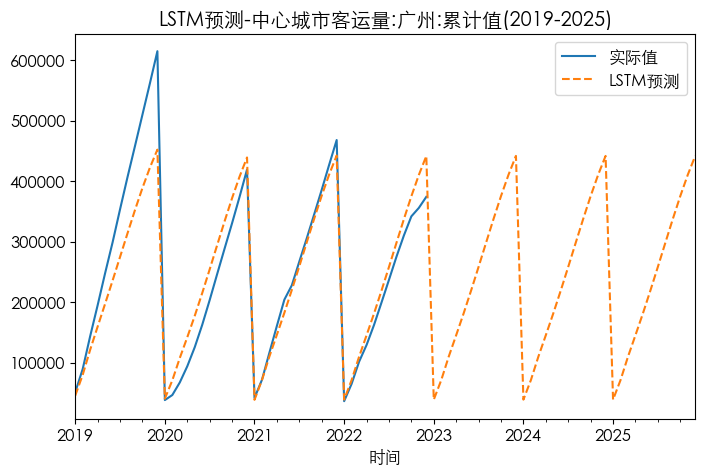

In [32]:
plt.rc('font', family='STXihei', size=12)
train_data['中心城市客运量:广州:累计值:月'].plot(figsize = (8,5),label='实际值', legend=True)
df1['LSTM_Predictions'].plot(legend = True,label='LSTM预测', linestyle='--');
plt.title('LSTM预测-中心城市客运量:广州:累计值(2019-2025)')